Question 1

In [ ]:
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense
from keras.layers import Flatten,Dropout
from keras.optimizers import SGD , Adam
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt

In [ ]:
#=======================loading the data and preprocessing======================
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train =to_categorical(y_train, 10)
y_test = to_categorical(y_test , 10)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

(x_train,x_vali) = x_train[5000:] , x_train[:5000]
(y_train,y_vali) = y_train[5000:] , y_train[:5000]

A) Adding convolution layers and comparing to MLP

In [ ]:
#defining the model
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Flatten())
model1.add(Dense(1000, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(10, activation='softmax'))

model1.summary()

#compiling the model
opt = Adam(lr = 0.001)
model1.compile(optimizer = opt, loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model1.fit(x_train,y_train,epochs = 50, batch_size = 64,validation_data = (x_vali,y_vali),verbose = 0)


In [ ]:
#plotting the results

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc = 'upper right')

In [ ]:
#evaluating test data
result = model1.evaluate(x_test,y_test)
name = model1.metrics_names
print('test {} is {} and test {} is {}'.format(name[0],result[0],name[1],result[1]))

B) Adding Batch normalization and Maxpooling layers

In [ ]:
#defining the model
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(1000, activation='relu', kernel_initializer='he_uniform'))
model2.add(BatchNormalization())

model2.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model2.add(BatchNormalization())

model2.add(Dense(10, activation='softmax'))

model2.summary()

#compiling the model
opt = Adam(lr = 0.001)
model2.compile(optimizer = opt, loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model2.fit(x_train,y_train,epochs = 50, batch_size = 64,validation_data = (x_vali,y_vali),verbose = 0)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)       

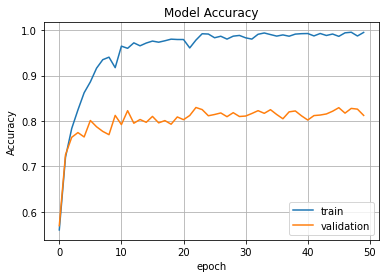

In [ ]:
#plotting the results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

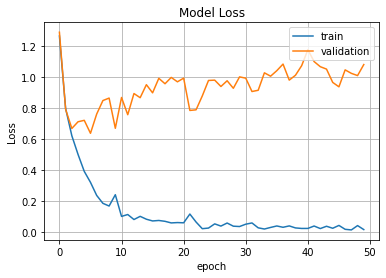

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc = 'upper right')

In [ ]:
#evaluating test data
print(model2.evaluate(x_test,y_test))
print(model2.metrics_names)

313/313 [==============================] - 1s 3ms/step - loss: 1.2117 - accuracy: 0.8111


TypeError: ignored

C) Adding Dropout layers

In [ ]:
#the final model(maxpooling + dropout + batchnormalization)
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.3))
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.4))
model3.add(Flatten())
model3.add(Dense(1000, activation='relu', kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

model3.summary()

# compile model
opt = Adam(lr=0.001)
#opt = Adam(lr=0.001, momentum = 0.9)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model3.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_vali,y_vali), verbose=0)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)       

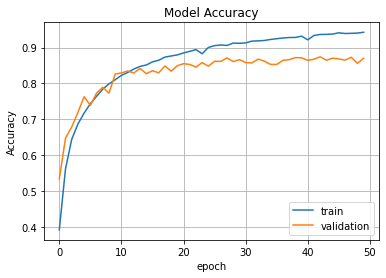

In [ ]:
#plotting the results
#plotting the results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

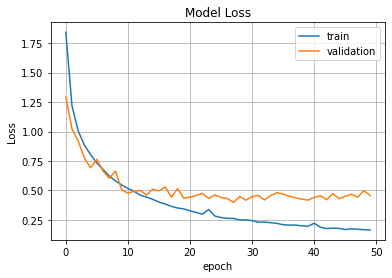

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc = 'upper right')

In [ ]:
#evaluating test data
result = model3.evaluate(x_test,y_test)
name = model3.metrics_names
print('test {} is {} and test {} is {}'.format(name[0],result[0],name[1],result[1]))


313/313 [==============================] - 1s 3ms/step - loss: 0.4733 - accuracy: 0.8687
test loss is 0.4733157157897949 and test accuracy is 0.8687000274658203


**Enhancing the Overfitting

In [ ]:
#the final model(maxpooling + dropout + batchnormalization)
#=============Changing the optimizer in order to enhance the overfitting=========================================================


model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.3))
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.4))
model3.add(Flatten())
model3.add(Dense(1000, activation='relu', kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

model3.summary()

# compile model
# opt = Adam(lr=0.001)

#=============We use SGD instead of Adam=======================================
opt = SGD(lr=0.001, momentum = 0.9)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model3.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_vali,y_vali), verbose=0)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 64)       

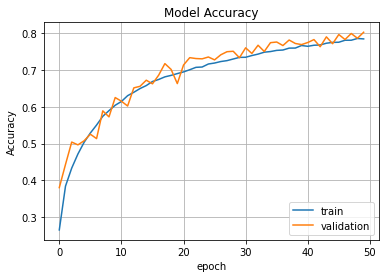

In [ ]:
#plotting the results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

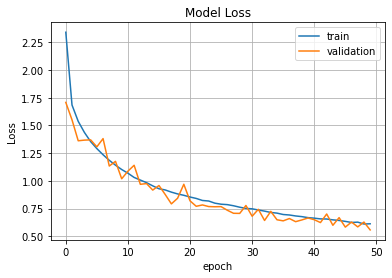

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc = 'upper right')

In [ ]:
#evaluating test data
result = model3.evaluate(x_test,y_test)
name = model3.metrics_names
print('test {} is {} and test {} is {}'.format(name[0],result[0],name[1],result[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.5911 - accuracy: 0.7970
test loss is 0.5911417603492737 and test accuracy is 0.796999990940094


D) Implementing early stopping

In [ ]:
from keras.callbacks import EarlyStopping

model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.3))
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.4))
model3.add(Flatten())
model3.add(Dense(1000, activation='relu', kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

# compile model
opt = Adam(lr=0.001)
#opt = Adam(lr=0.001, momentum = 0.9)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)

history = model3.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_vali,y_vali), verbose=0,callbacks=[es])

Epoch 00035: early stopping


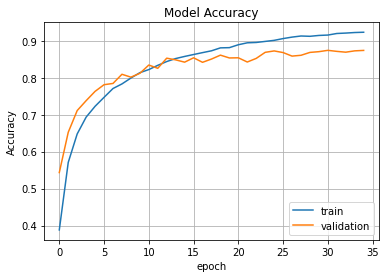

In [ ]:
#plotting the results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

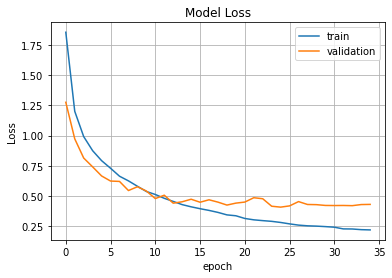

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc = 'upper right')

In [ ]:
#evaluating test data
result = model3.evaluate(x_test,y_test)
name = model3.metrics_names
print('test {} is {} and test {} is {}'.format(name[0],result[0],name[1],result[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.4735 - accuracy: 0.8605
test loss is 0.4735264778137207 and test accuracy is 0.8604999780654907
